### Imports

In [2]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

### Callbacks

In [7]:
import time
from functools import partial

In [32]:
def rand_fn(cb):
    for i in range(5):
        cb(i, i*2)
        time.sleep(1)

In [33]:
def printf(i, j, excl):
    print(f'{excl}_epoch_{i}')

In [34]:
rand_fn(partial(printf,excl='Lets see!!'))

Lets see!!_epoch_0
Lets see!!_epoch_1
Lets see!!_epoch_2
Lets see!!_epoch_3
Lets see!!_epoch_4


In [35]:
rand_fn(lambda i,j=9: print(f'Wow lambda with epoch {i}, test {j}'))

Wow lambda with epoch 0, test 0
Wow lambda with epoch 1, test 2
Wow lambda with epoch 2, test 4
Wow lambda with epoch 3, test 6
Wow lambda with epoch 4, test 8


In [37]:
p1 = partial(printf, 1,2)

In [70]:
x = torch.randn(100)
y = 2*x+4
z = 2*x**3+4

In [71]:
x, y, z

(tensor([-1.2090, -0.6950, -0.1367,  0.8105,  1.4805, -0.1381, -1.2899, -0.8167,
         -2.5611, -0.9711, -0.5440, -2.0192,  0.1588, -0.0712,  0.4977,  0.5592,
         -0.0106,  1.5847, -1.2351,  0.7648,  0.5892,  0.7746,  1.1947, -0.2134,
          0.1729,  0.5730, -1.1746,  1.2534, -1.4749, -0.5804, -0.0325, -0.4682,
         -2.0134, -0.1455,  0.8796,  0.7226,  0.4653,  0.1597, -0.4037, -1.5664,
          0.2742,  0.1851, -0.1658,  0.3117,  0.5379, -1.0156, -0.1305,  0.4906,
         -0.1360, -0.5546,  1.5158, -1.6576,  2.6146,  1.5203,  0.2613, -0.6651,
         -0.6697,  0.3326,  0.4230, -1.9040,  1.4942, -0.1302, -0.2260,  1.2331,
          0.9112,  0.1802, -0.9162,  0.4393, -1.7377, -0.8772, -1.2436,  0.1902,
         -0.4614,  0.3282,  0.9795, -0.0897, -0.4019,  0.0164, -0.7823,  0.7566,
          0.1378, -0.0822,  0.4286, -0.8362, -0.5680,  0.6239, -0.4077,  0.0524,
         -0.2799, -0.1841, -0.6943,  0.0986,  0.5529, -1.9049, -0.3928,  0.6429,
          0.1944, -0.4001,  

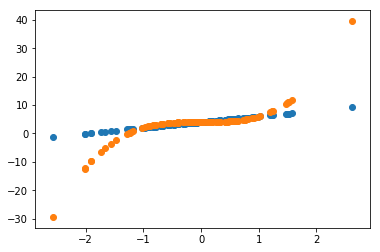

In [72]:
plt.scatter(x, y)
plt.scatter(x, z)

In [73]:
def cov(x, y): 
    t = ((x*y).mean()) - (x.mean()*y.mean())
    return t

In [123]:
def pcorr(x, y):
    covar = cov(x,y)
    stdx, stdy = ((x-x.mean()).pow(2).mean()).sqrt(), ((y-y.mean()).pow(2).mean()).sqrt()
#     print(covar, stdx, stdy)
    print(covar/(stdx*stdy))
    return covar/(stdx*stdy)

In [81]:
cov(x, x), cov(x, y), cov(x, z)

(tensor(0.8344), tensor(1.6689), tensor(4.6252))

In [85]:
pcorr(x, x), pcorr(x, y), pcorr(x, z), pcorr(x, x**9)

tensor(0.8344) tensor(0.9135) tensor(0.9135)
tensor(1.6689) tensor(0.9135) tensor(1.8269)
tensor(4.6252) tensor(0.9135) tensor(6.3036)
tensor(314.2314) tensor(0.9135) tensor(747.8719)


(tensor(1.), tensor(1.), tensor(0.8032), tensor(0.4600))

In [97]:
pcorr(x, x).

tensor(0.8344) tensor(0.9135) tensor(0.9135)


array(1., dtype=float32)

In [124]:
n=30
a, b = list(range(n)), [pcorr(x, x.pow(n)).numpy() for n in range(n)]

tensor(nan)
tensor(1.)
tensor(-0.2148)
tensor(0.8032)
tensor(-0.1513)
tensor(0.6145)
tensor(-0.0741)
tensor(0.5122)
tensor(-0.0183)
tensor(0.4600)
tensor(0.0186)
tensor(0.4326)
tensor(0.0435)
tensor(0.4176)
tensor(0.0611)
tensor(0.4090)
tensor(0.0745)
tensor(0.4036)
tensor(0.0855)
tensor(0.4001)
tensor(0.0949)
tensor(0.3975)
tensor(0.1034)
tensor(0.3953)
tensor(0.1112)
tensor(0.3935)
tensor(0.1186)
tensor(0.3917)
tensor(0.1257)
tensor(0.3899)


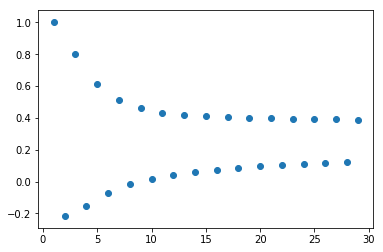

In [119]:
plt.scatter(a, b)

### CNN on cuda

In [4]:
#export
from exp.nb_05b import *
torch.set_num_threads(2)

In [5]:
x_train,y_train,x_valid,y_valid = get_data()

#export
def normalize_to(train, valid):
    m,s = train.mean(),train.std()
    return normalize(train, m, s), normalize(valid, m, s)

x_train,x_valid = normalize_to(x_train,x_valid)
train_ds,valid_ds = Dataset(x_train, y_train),Dataset(x_valid, y_valid)

x_train.mean(),x_train.std()

(tensor(3.0614e-05), tensor(1.))

In [6]:
nh,bs = 50,512
c = y_train.max().item()+1
loss_func = F.cross_entropy

data = DataBunch(*get_dls(train_ds, valid_ds, bs), c)

In [7]:
# def convout(i, k, p, s):
#     return (i-k+2*p)//s + 1

# # convout(28, 5, 2, 2), padding(28, 5, 2, 14),convout(14, 3, 1, 2),convout(7, 3, 1, 2)
# convout(2, 3, 1, 2)

In [8]:
# #export
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x): return self.func(x)

def flatten(x):      return x.view(x.shape[0], -1)
def mnist_resize(x): return x.view(-1, 1, 28, 28)

def get_cnn_model(data):
    return nn.Sequential(
        Lambda(mnist_resize),
        nn.Conv2d( 1, 8, 5, padding=2,stride=2), nn.ReLU(), #14
        nn.Conv2d( 8,16, 3, padding=1,stride=2), nn.ReLU(), # 7
        nn.Conv2d(16,32, 3, padding=1,stride=2), nn.ReLU(), # 4
        nn.Conv2d(32,32, 3, padding=1,stride=2), nn.ReLU(), # 2
        nn.AdaptiveAvgPool2d(1),
        Lambda(flatten),
        nn.Linear(32,data.c)
    )

model = get_cnn_model(data)

In [9]:
cbfs = [Recorder, partial(AvgStatsCallback,accuracy)]
opt = optim.SGD(model.parameters(), lr=0.4)
learn = Learner(model, opt, loss_func, data)
run = Runner(cb_funcs=cbfs)

# %time run.fit(1, learn)

### CUDA, Refactoring

In [10]:
# Somewhat more flexible way
device = torch.device('cuda',0)

class CudaCallback(Callback):
    def __init__(self,device): self.device=device
    def begin_fit(self): self.model.to(device)
    def begin_batch(self): self.run.xb,self.run.yb = self.xb.to(device),self.yb.to(device)

# Somewhat less flexible, but quite convenient
torch.cuda.set_device(device)

#export
class CudaCallback(Callback):
    def begin_fit(self): self.model.cuda()
    def begin_batch(self): self.run.xb,self.run.yb = self.xb.cuda(),self.yb.cuda()

cbfs.append(CudaCallback)

model = get_cnn_model(data)

opt = optim.SGD(model.parameters(), lr=0.4)
learn = Learner(model, opt, loss_func, data)
run = Runner(cb_funcs=cbfs)

# %time run.fit(3, learn)

### Refactoring

In [11]:
def conv2d(ni, nf, ks=3, stride=2):
    return nn.Sequential(
        nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride), nn.ReLU())

#export
class BatchTransformXCallback(Callback):
    _order=2
    def __init__(self, tfm): self.tfm = tfm
    def begin_batch(self): self.run.xb = self.tfm(self.xb)

def view_tfm(*size):
    def _inner(x): return x.view(*((-1,)+size))
    return _inner

mnist_view = view_tfm(1,28,28)
cbfs.append(partial(BatchTransformXCallback, mnist_view))

nfs = [8,16,32,32]
def get_cnn_layers(data, nfs):
    nfs = [1] + nfs
    return [
        conv2d(nfs[i], nfs[i+1], 5 if i==0 else 3)
        for i in range(len(nfs)-1)
    ] + [nn.AdaptiveAvgPool2d(1), Lambda(flatten), nn.Linear(nfs[-1], data.c)]

def get_cnn_model(data, nfs): return nn.Sequential(*get_cnn_layers(data, nfs))

def get_runner(model, data, lr=0.6, cbs=None, opt_func=None, loss_func = F.cross_entropy):
    if opt_func is None: opt_func = optim.SGD
    opt = opt_func(model.parameters(), lr=lr)
    learn = Learner(model, opt, loss_func, data)
    return learn, Runner(cb_funcs=listify(cbs))

model = get_cnn_model(data, nfs)
learn,run = get_runner(model, data, lr=0.4, cbs=cbfs)

In [12]:
run.fit(3, learn)

train: [1.957883125, tensor(0.3072, device='cuda:0')]
valid: [0.71319453125, tensor(0.7679, device='cuda:0')]
train: [0.4622051953125, tensor(0.8576, device='cuda:0')]
valid: [0.2350505126953125, tensor(0.9316, device='cuda:0')]
train: [0.19021236328125, tensor(0.9436, device='cuda:0')]
valid: [0.14325621337890626, tensor(0.9576, device='cuda:0')]


### Hooks

In [22]:
#manual insertions

In [95]:
model

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU()
  )
  (1): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (4): AdaptiveAvgPool2d(output_size=1)
  (5): Lambda()
  (6): Linear(in_features=32, out_features=10, bias=True)
)

In [96]:
actv_mean = [[] for _ in range(10)]
actv_std = [[] for _ in range(10)]

In [97]:
# This is the exact calculation to be done for each layer
def actv_stats(i, m, ip, op):
#     print(i, type(m), ip[0].shape, op.shape)
    if m.training:
        actv_mean[i].append(op.data.mean())
        actv_std[i].append(op.data.std())

In [14]:
# This is for registering the hook with the above fn for a specific layer
def conv_check(m, count=0):
    global count1
    count1 = count
    for l in m.children():
        if isinstance(l, nn.Conv2d): 
#             m.register_forward_hook(actv_stats)
            count1 += 1
        print(type(l), count1)
        conv_check(l, count1)
#         print('recursivedone')

In [15]:
def conv_check_clos(m, count=0):
    def _inner(l, count):
        if isinstance(l, nn.Conv2d):
            count += 1
        print('inner1:',type(l), count)
        return count
    def _inner2(m, count1):
        for l in m.children():
            count1 = _inner(l, count1)
            print('inner2:',type(l), count1)
            _inner2(l, count1)
    _inner2(m, count)

In [16]:
conv_check_clos(model)

inner1: <class 'torch.nn.modules.container.Sequential'> 0
inner2: <class 'torch.nn.modules.container.Sequential'> 0
inner1: <class 'torch.nn.modules.conv.Conv2d'> 1
inner2: <class 'torch.nn.modules.conv.Conv2d'> 1
inner1: <class 'torch.nn.modules.activation.ReLU'> 1
inner2: <class 'torch.nn.modules.activation.ReLU'> 1
inner1: <class 'torch.nn.modules.container.Sequential'> 0
inner2: <class 'torch.nn.modules.container.Sequential'> 0
inner1: <class 'torch.nn.modules.conv.Conv2d'> 1
inner2: <class 'torch.nn.modules.conv.Conv2d'> 1
inner1: <class 'torch.nn.modules.activation.ReLU'> 1
inner2: <class 'torch.nn.modules.activation.ReLU'> 1
inner1: <class 'torch.nn.modules.container.Sequential'> 0
inner2: <class 'torch.nn.modules.container.Sequential'> 0
inner1: <class 'torch.nn.modules.conv.Conv2d'> 1
inner2: <class 'torch.nn.modules.conv.Conv2d'> 1
inner1: <class 'torch.nn.modules.activation.ReLU'> 1
inner2: <class 'torch.nn.modules.activation.ReLU'> 1
inner1: <class 'torch.nn.modules.contain

In [98]:
class conv_check_class():
    def __init__(self, count=0):
        self.count = count
        self.stored = []
        
    def update_hook(self, m):
        for l in m.children():
            if isinstance(l, (nn.Conv2d, nn.ReLU, nn.AdaptiveAvgPool2d, nn.Linear)):
#             if 1==1:
                print(l, self.count)
                f = partial(actv_stats, self.count)
                self.stored.append(l.register_forward_hook(f))
                self.count += 1
            self.update_hook(l)
        return self.stored

hconv = conv_check_class()

hstored1 = hconv.update_hook(model)

Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2)) 0
ReLU() 1
Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)) 2
ReLU() 3
Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)) 4
ReLU() 5
Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)) 6
ReLU() 7
AdaptiveAvgPool2d(output_size=1) 8
Linear(in_features=32, out_features=10, bias=True) 9


In [99]:
run.fit(3, learn)

train: [1.89094828125, tensor(0.3324, device='cuda:0')]
valid: [0.58856064453125, tensor(0.8125, device='cuda:0')]
train: [0.3477845703125, tensor(0.8943, device='cuda:0')]
valid: [0.18861728515625, tensor(0.9425, device='cuda:0')]
train: [0.17796701171875, tensor(0.9461, device='cuda:0')]
valid: [0.1265625732421875, tensor(0.9631, device='cuda:0')]


In [100]:
import numpy as np
actv_mean1 = np.array(actv_mean)
actv_std1 = np.array(actv_std)

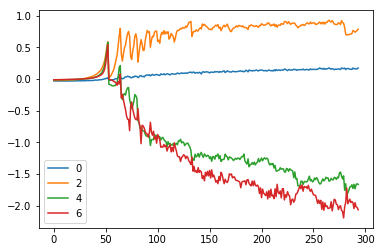

In [101]:
for o in actv_mean1[[0, 2, 4, 6],:]: plt.plot(o)
plt.legend([0, 2, 4, 6])

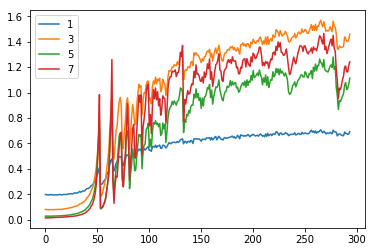

In [102]:
for o in actv_mean1[[1, 3, 5, 7],:]: plt.plot(o)
plt.legend([1, 3, 5, 7])

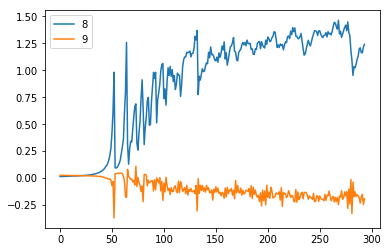

In [103]:
for o in actv_mean1[[8, 9],:]: plt.plot(o)
plt.legend([8, 9])

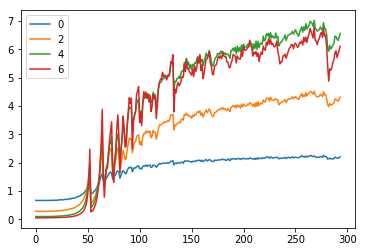

In [104]:
for o in actv_std1[[0, 2, 4, 6],:]: plt.plot(o)
plt.legend([0, 2, 4, 6])

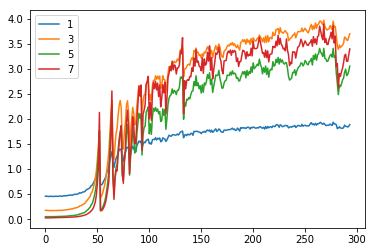

In [105]:
for o in actv_std1[[1, 3, 5, 7],:]: plt.plot(o)
plt.legend([1, 3, 5, 7])

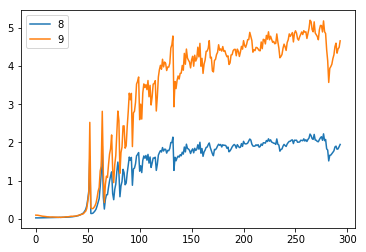

In [106]:
for o in actv_std1[[8, 9],:]: plt.plot(o)
plt.legend([8, 9])

In [107]:
# conv, relu activations, histograms

In [109]:
for h in hstored1: h.remove()

#### List of Hooks

In [12]:
class ListContainer():
    def __init__(self, items):
        self.items = listify(items)
        
    def __len__(self): return len(self.items)
    
    def __getitem__(self, idx):
        if is_listy(idx): 
            if isinstance(idx[0], bool): return [self.items[cnt] for cnt,i in enumerate(idx) if i]
            else: return [self.items[i] for i in idx]
        else : return self.items[idx]
        
    def __iter__(self): return iter(self.items)
    
    def __setitem__(self, i, o): self.items[i]=o
    
    def __delitem__(self, i): del self.items[i]
    
    def __repr__(self): return f'list containing {len(self.items)} elements'

In [223]:
x=ListContainer(('12', '212', '2123'))

In [217]:
x.__setitem__(2, '1212')

In [219]:
x.__delitem__(0)

In [220]:
x.items

['212', '1212']

In [228]:
x[True,False, True]

['12', '2123']

In [230]:
x[tensor(0)]

'12'

In [13]:
#export
def children(m): return list(m.children())

class Hook():
    def __init__(self, m, f): self.hook = m.register_forward_hook(partial(f, self))
    def remove(self): self.hook.remove()
    def __del__(self): self.remove()

def append_stats(hook, mod, inp, outp):
    if not hasattr(hook,'stats'): hook.stats = ([],[])
    means,stds = hook.stats
    if mod.training:
        means.append(outp.data.mean())
        stds .append(outp.data.std())
#export
class ListContainer():
    def __init__(self, items): self.items = listify(items)
    def __getitem__(self, idx):
        try: return self.items[idx]
        except TypeError:
            if isinstance(idx[0],bool):
                assert len(idx)==len(self) # bool mask
                return [o for m,o in zip(idx,self.items) if m]
            return [self.items[i] for i in idx]
    def __len__(self): return len(self.items)
    def __iter__(self): return iter(self.items)
    def __setitem__(self, i, o): self.items[i] = o
    def __delitem__(self, i): del(self.items[i])
    def __repr__(self):
        res = f'{self.__class__.__name__} ({len(self)} items)\n{self.items[:10]}'
        if len(self)>10: res = res[:-1]+ '...]'
        return res
    
#export
from torch.nn import init

class Hooks(ListContainer):
    def __init__(self, ms, f): 
        super().__init__([Hook(m, f) for m in ms])
    def __enter__(self, *args): return self
    def __exit__ (self, *args): self.remove()
    def __del__(self): self.remove()

    def __delitem__(self, i):
        self[i].remove()
        super().__delitem__(i)
        
    def remove(self):
        for h in self: h.remove()

In [14]:
model = get_cnn_model(data, nfs).cuda()
learn,run = get_runner(model, data, lr=0.9, cbs=cbfs)

In [50]:
hooks = Hooks(model, append_stats)
hooks

Hooks (12 items)
[<__main__.Hook object at 0x7fdd8c25f7f0>, <__main__.Hook object at 0x7fdd8c25f780>, <__main__.Hook object at 0x7fdd8c25f6a0>, <__main__.Hook object at 0x7fdd8c25f5c0>, <__main__.Hook object at 0x7fdd8c25f5f8>, <__main__.Hook object at 0x7fdd8c25f550>, <__main__.Hook object at 0x7fdd8c25f4e0>, <__main__.Hook object at 0x7fdd8c25f0b8>, <__main__.Hook object at 0x7fdd8c25f470>, <__main__.Hook object at 0x7fdd8c25f320>...]

In [85]:
hooks.remove()

##### small exps understanding iters

In [55]:
type(hooks)

__main__.Hooks

In [68]:
class dummy():
    def __init__(self, item):
        self.item = item
    def __len__(self):
        return len(self.item)
    
    def __repr__(self):
        res = f'{self.__class__.__name__} ({len(self)} item)\n{self.item[:10]}'
        return res
        
class dummy2(dummy):
    def __init__(self, items):
        super().__init__([dummy(item) for item in items ])    

In [70]:
t = dummy2(['checkl']*4)

In [82]:
t.item[2]

dummy (6 item)
checkl

In [27]:
model

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU()
  )
  (1): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (4): AdaptiveAvgPool2d(output_size=1)
  (5): Lambda()
  (6): Linear(in_features=32, out_features=10, bias=True)
)

In [26]:
hooks

Hooks (7 items)
[<__main__.Hook object at 0x7fdd8c1ca6d8>, <__main__.Hook object at 0x7fdd8c1ca978>, <__main__.Hook object at 0x7fdd8c422ba8>, <__main__.Hook object at 0x7fdd8c422c88>, <__main__.Hook object at 0x7fdd8c422da0>, <__main__.Hook object at 0x7fdd8c422b38>, <__main__.Hook object at 0x7fdd8c422e10>]

##### Back

In [86]:
x,y = next(iter(data.train_dl))
x = mnist_resize(x).cuda()

x.mean(),x.std()

p = model[0](x)
print(p.mean(),p.std())

for l in model:
    if isinstance(l, nn.Sequential):
        init.kaiming_normal_(l[0].weight)
        l[0].bias.data.zero_()

p = model[0](x)
print(p.mean(),p.std())

tensor(0.1805, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.3178, device='cuda:0', grad_fn=<StdBackward0>)
tensor(0.4675, device='cuda:0', grad_fn=<MeanBackward0>) tensor(1.0025, device='cuda:0', grad_fn=<StdBackward0>)


#### Hist

In [24]:
def append_stats(hook, mod, inp, outp):
    if not hasattr(hook,'stats'): hook.stats = ([],[],[])
    means,stds,hists = hook.stats
    if mod.training:
        means.append(outp.data.mean().cpu())
        stds .append(outp.data.std().cpu())
        hists.append(outp.data.cpu().histc(40,0,10)) #histc isn't implemented on the GPU
        
model = get_cnn_model(data, nfs).cuda()
learn,run = get_runner(model, data, lr=0.9, cbs=cbfs)

for l in model:
    if isinstance(l, nn.Sequential):
        init.kaiming_normal_(l[0].weight)
        l[0].bias.data.zero_()

In [25]:
with Hooks(model, append_stats) as hooks: run.fit(1, learn)

train: [1.33313421875, tensor(0.5723, device='cuda:0')]
valid: [0.2653849609375, tensor(0.9224, device='cuda:0')]


In [17]:
t1=hooks[0]

In [19]:
len(t1.stats[2][0])

40

In [38]:
t

tensor([[4.9372e+05, 4.9077e+05, 4.9609e+05,  ..., 3.3880e+05, 3.3874e+05,
         2.2225e+05],
        [9.8098e+04, 1.0342e+05, 1.0359e+05,  ..., 8.3240e+04, 8.3239e+04,
         5.4230e+04],
        [7.6365e+04, 7.5276e+04, 7.5324e+04,  ..., 9.3519e+04, 9.3135e+04,
         5.7287e+04],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.2000e+02, 1.3100e+02,
         1.3700e+02],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.7600e+02, 9.4000e+01,
         1.0600e+02],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.1900e+02, 6.9000e+01,
         5.6000e+01]])

In [40]:
t.shape

torch.Size([40, 98])

In [73]:
t/t.sum(dim=0).unsqueeze(0)

tensor([[6.1498e-01, 6.1131e-01, 6.1793e-01,  ..., 4.2213e-01, 4.2200e-01,
         4.2195e-01],
        [1.2219e-01, 1.2883e-01, 1.2903e-01,  ..., 1.0372e-01, 1.0370e-01,
         1.0296e-01],
        [9.5121e-02, 9.3765e-02, 9.3825e-02,  ..., 1.1652e-01, 1.1603e-01,
         1.0876e-01],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.7412e-04, 1.6320e-04,
         2.6010e-04],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.1929e-04, 1.1710e-04,
         2.0124e-04],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.4827e-04, 8.5959e-05,
         1.0632e-04]])

In [26]:
t=torch.stack(hooks[0].stats[2]).t().float()

In [166]:
torch.stack(hooks[0].stats[2]).t().float().log1p().sum(dim=0)

tensor([251.8111, 243.5017, 273.7857, 284.8589, 274.8803, 284.5366, 270.5398,
        291.6339, 259.9235, 262.1779, 288.2370, 285.2852, 291.5260, 277.6511,
        295.8062, 284.7162, 298.2117, 285.4803, 293.4277, 289.3548, 290.7386,
        292.0014, 290.6313, 292.9819, 200.2332, 229.3359, 224.3498, 216.1972,
        301.4565, 302.0923, 302.0127, 303.1362, 303.1775, 303.9331, 304.4315,
        303.9088, 305.1615, 304.7551, 268.1440, 271.3652, 277.0861, 293.4761,
        305.3237, 312.2903, 311.7312, 314.7014, 314.6419, 313.8931, 315.2707,
        317.6677, 318.3716, 315.4821, 308.8746, 311.1998, 314.5747, 317.5499,
        318.2152, 317.5591, 319.5114, 307.9389, 313.4597, 314.9713, 290.2546,
        284.8245, 295.8150, 307.3593, 309.9408, 305.9018, 297.0680, 306.2454,
        307.3970, 311.1239, 313.4704, 315.3575, 310.9887, 307.0809, 313.6784,
        311.4209, 309.6801, 307.5875, 308.4310, 306.7231, 309.2258, 305.9720,
        308.5490, 310.0266, 285.4426, 307.0323, 310.5867, 311.64

In [130]:
tensor(10.).histc(10, 0, 10)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

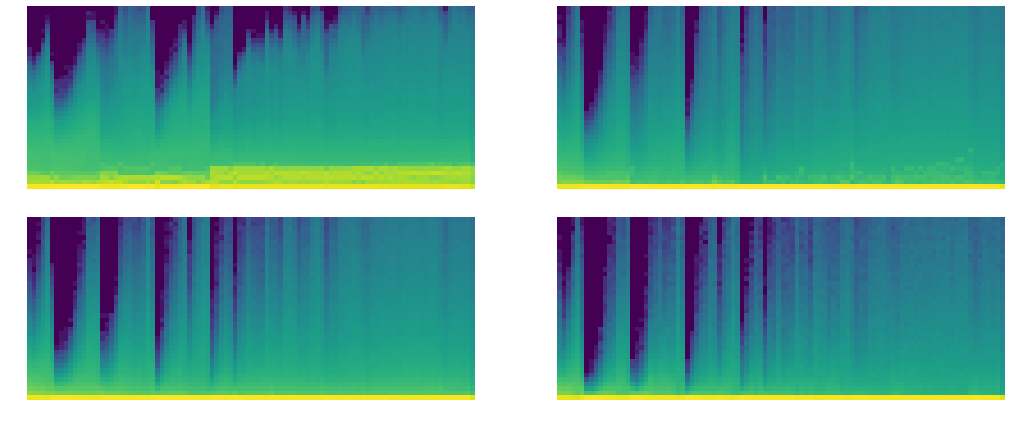

In [31]:
# Thanks to @ste for initial version of histogram plotting code
def get_hist(h): return torch.stack(h.stats[2]).t().float().log1p()
fig,axes = plt.subplots(2,2, figsize=(15,6))

for ax,h in zip(axes.flatten(), hooks[:4]):
    ax.imshow(get_hist(h), origin='lower')
    ax.axis('off')
plt.tight_layout()

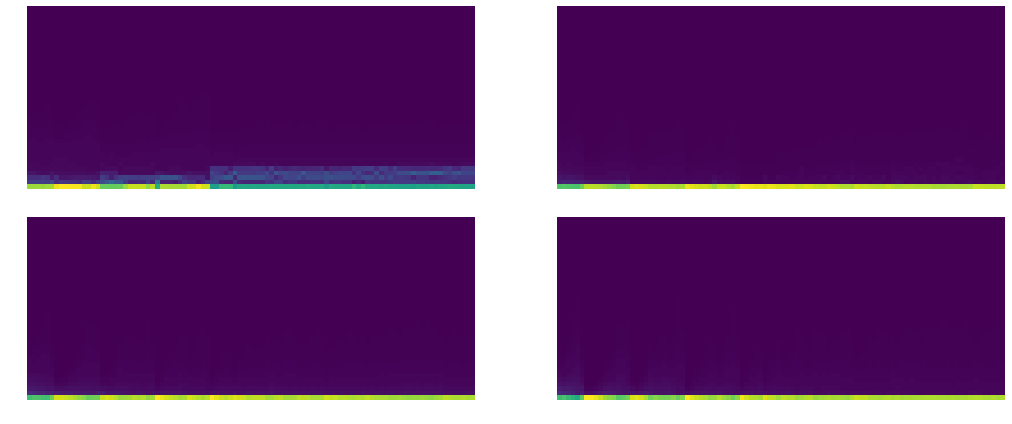

In [79]:
# Thanks to @ste for initial version of histogram plotting code
def get_hist1(h): 
    x=torch.stack(h.stats[2]).t().float()
    return x/x.sum(dim=0).unsqueeze(0)
fig,axes = plt.subplots(2,2, figsize=(15,6))

for ax,h in zip(axes.flatten(), hooks[:4]):
    ax.imshow(get_hist1(h), origin='lower')
    ax.axis('off')
plt.tight_layout()

In [5]:
with open('/data/home/h216520/Desktop/fastai_work/OCR.ipynb') as f:
    x=f.read()
    print(type(f))

<class '_io.TextIOWrapper'>


In [40]:
files=[]
for i in range(972):
    files.append(open('/data/home/h216520/Desktop/fastai_work/fav3part2/azure-pipelines.yml', 'w'))

### Batch_Norm

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

#export
from exp.nb_06 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Without

In [4]:
x_train,y_train,x_valid,y_valid = get_data()

x_train,x_valid = normalize_to(x_train,x_valid)
train_ds,valid_ds = Dataset(x_train, y_train),Dataset(x_valid, y_valid)

nh,bs = 50,512
c = y_train.max().item()+1
loss_func = F.cross_entropy

data = DataBunch(*get_dls(train_ds, valid_ds, bs), c)

mnist_view = view_tfm(1,28,28)
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        CudaCallback,
        partial(BatchTransformXCallback, mnist_view)]

nfs = [8,16,32,64,64]

In [34]:
learn,run = get_learn_run(nfs, data, 0.001, conv_layer, cbs=cbfs)
%time run.fit(5, learn)

train: [2.32049953125, tensor(0.1030, device='cuda:0')]
valid: [2.3168169921875, tensor(0.1107, device='cuda:0')]
train: [2.31149015625, tensor(0.1144, device='cuda:0')]
valid: [2.3080009765625, tensor(0.1242, device='cuda:0')]
train: [2.30316546875, tensor(0.1294, device='cuda:0')]
valid: [2.2997416015625, tensor(0.1415, device='cuda:0')]
train: [2.295225625, tensor(0.1493, device='cuda:0')]
valid: [2.291699609375, tensor(0.1621, device='cuda:0')]
train: [2.2874015625, tensor(0.1741, device='cuda:0')]
valid: [2.28366171875, tensor(0.1880, device='cuda:0')]
CPU times: user 4.68 s, sys: 783 ms, total: 5.47 s
Wall time: 5.46 s


In [20]:
learn,run = get_learn_run(nfs, data, 0.01, conv_layer, cbs=cbfs)
%time run.fit(5, learn)

train: [2.24780421875, tensor(0.1886, device='cuda:0')]
valid: [2.1536158203125, tensor(0.3965, device='cuda:0')]
train: [1.8626628125, tensor(0.5124, device='cuda:0')]
valid: [1.30739404296875, tensor(0.6825, device='cuda:0')]
train: [0.90143234375, tensor(0.7524, device='cuda:0')]
valid: [0.592249560546875, tensor(0.8408, device='cuda:0')]
train: [0.5342010546875, tensor(0.8445, device='cuda:0')]
valid: [0.418200537109375, tensor(0.8825, device='cuda:0')]
train: [0.41388015625, tensor(0.8786, device='cuda:0')]
valid: [0.3439680908203125, tensor(0.8999, device='cuda:0')]
CPU times: user 4.94 s, sys: 731 ms, total: 5.67 s
Wall time: 5.5 s


In [22]:
learn,run = get_learn_run(nfs, data, 0.1, conv_layer, cbs=cbfs)
%time run.fit(5, learn)

train: [0.947094296875, tensor(0.7096, device='cuda:0')]
valid: [0.294803076171875, tensor(0.9129, device='cuda:0')]
train: [0.27221607421875, tensor(0.9189, device='cuda:0')]
valid: [0.20140330810546875, tensor(0.9408, device='cuda:0')]
train: [0.193566875, tensor(0.9415, device='cuda:0')]
valid: [0.1408010498046875, tensor(0.9574, device='cuda:0')]
train: [0.139719189453125, tensor(0.9578, device='cuda:0')]
valid: [0.11855823974609375, tensor(0.9652, device='cuda:0')]
train: [0.1144638671875, tensor(0.9646, device='cuda:0')]
valid: [0.1184726806640625, tensor(0.9656, device='cuda:0')]
CPU times: user 4.63 s, sys: 813 ms, total: 5.44 s
Wall time: 5.43 s


In [26]:
learn,run = get_learn_run(nfs, data, .5, conv_layer, cbs=cbfs)
%time run.fit(5, learn)

train: [1.52849234375, tensor(0.4951, device='cuda:0')]
valid: [0.258629443359375, tensor(0.9233, device='cuda:0')]
train: [0.1755623828125, tensor(0.9466, device='cuda:0')]
valid: [0.10831990966796876, tensor(0.9673, device='cuda:0')]
train: [0.3946256640625, tensor(0.8899, device='cuda:0')]
valid: [0.20109129638671874, tensor(0.9412, device='cuda:0')]
train: [0.147959248046875, tensor(0.9545, device='cuda:0')]
valid: [0.11161932373046875, tensor(0.9675, device='cuda:0')]
train: [0.089335869140625, tensor(0.9718, device='cuda:0')]
valid: [0.0848570068359375, tensor(0.9736, device='cuda:0')]
CPU times: user 4.67 s, sys: 743 ms, total: 5.41 s
Wall time: 5.41 s


In [28]:
learn,run = get_learn_run(nfs, data, .75, conv_layer, cbs=cbfs)
%time run.fit(5, learn)

train: [1.80311265625, tensor(0.3841, device='cuda:0')]
valid: [0.575915478515625, tensor(0.7950, device='cuda:0')]
train: [0.30229171875, tensor(0.9086, device='cuda:0')]
valid: [0.1453071044921875, tensor(0.9553, device='cuda:0')]
train: [0.127481943359375, tensor(0.9607, device='cuda:0')]
valid: [0.1177689697265625, tensor(0.9649, device='cuda:0')]
train: [0.099764501953125, tensor(0.9695, device='cuda:0')]
valid: [0.1353005615234375, tensor(0.9580, device='cuda:0')]
train: [0.0720773095703125, tensor(0.9778, device='cuda:0')]
valid: [0.09465933837890625, tensor(0.9733, device='cuda:0')]
CPU times: user 4.7 s, sys: 785 ms, total: 5.49 s
Wall time: 5.48 s


In [32]:
learn,run = get_learn_run(nfs, data, .85, conv_layer, cbs=cbfs)
%time run.fit(5, learn)

train: [1.598471875, tensor(0.4413, device='cuda:0')]
valid: [0.2738348388671875, tensor(0.9152, device='cuda:0')]
train: [0.1992318359375, tensor(0.9393, device='cuda:0')]
valid: [0.14196317138671874, tensor(0.9588, device='cuda:0')]
train: [0.10347560546875, tensor(0.9686, device='cuda:0')]
valid: [0.08896378784179687, tensor(0.9736, device='cuda:0')]
train: [0.072380390625, tensor(0.9773, device='cuda:0')]
valid: [0.0813375, tensor(0.9746, device='cuda:0')]
train: [0.06082970703125, tensor(0.9809, device='cuda:0')]
valid: [0.085568017578125, tensor(0.9732, device='cuda:0')]
CPU times: user 4.8 s, sys: 719 ms, total: 5.52 s
Wall time: 5.51 s


In [15]:
sched = combine_scheds([0.3, 0.7], [sched_lin(0.6, .85), sched_lin(.85, 0.1)]) 
learn,run = get_learn_run(nfs, data, 0.9, conv_layer, cbs=cbfs+[partial(ParamScheduler,'lr', sched)])

run.fit(8, learn)

train: [1.45778390625, tensor(0.5134, device='cuda:0')]
valid: [0.3280900146484375, tensor(0.9017, device='cuda:0')]
train: [0.20329685546875, tensor(0.9391, device='cuda:0')]
valid: [0.12246651611328126, tensor(0.9615, device='cuda:0')]
train: [0.114012373046875, tensor(0.9648, device='cuda:0')]
valid: [0.1035958984375, tensor(0.9686, device='cuda:0')]
train: [0.07549044921875, tensor(0.9764, device='cuda:0')]
valid: [0.08248961181640625, tensor(0.9747, device='cuda:0')]
train: [0.0510380322265625, tensor(0.9845, device='cuda:0')]
valid: [0.07613021850585938, tensor(0.9767, device='cuda:0')]
train: [0.03994650634765625, tensor(0.9878, device='cuda:0')]
valid: [0.0656514892578125, tensor(0.9810, device='cuda:0')]
train: [0.02979921630859375, tensor(0.9914, device='cuda:0')]
valid: [0.06335931396484375, tensor(0.9819, device='cuda:0')]
train: [0.02348486083984375, tensor(0.9936, device='cuda:0')]
valid: [0.0638732666015625, tensor(0.9817, device='cuda:0')]


#### With bathnorm

In [19]:
class BatchNorm(nn.Module):
    def __init__(self, nf, mom=0.1, eps=1e-5):
        super().__init__()
        # NB: pytorch bn mom is opposite of what you'd expect
        self.mom,self.eps = mom,eps
        self.mults = nn.Parameter(torch.ones (nf,1,1))
        self.adds  = nn.Parameter(torch.zeros(nf,1,1))
        self.register_buffer('vars',  torch.ones(1,nf,1,1))
        self.register_buffer('means', torch.zeros(1,nf,1,1))

    def update_stats(self, x):
        m = x.mean((0,2,3), keepdim=True)
        v = x.var ((0,2,3), keepdim=True)
        self.means.lerp_(m, self.mom)
        self.vars.lerp_ (v, self.mom)
        return m,v
        
    def forward(self, x):
        if self.training:
            with torch.no_grad(): m,v = self.update_stats(x)
        else: m,v = self.means,self.vars
        x = (x-m) / (v+self.eps).sqrt()
        return x*self.mults + self.adds

def conv_layer(ni, nf, ks=3, stride=2, bn=True, **kwargs):
    # No bias needed if using bn
    layers = [nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride, bias=not bn),
              GeneralRelu(**kwargs)]
    if bn: layers.append(BatchNorm(nf))
    return nn.Sequential(*layers)

#export
def init_cnn_(m, f):
    if isinstance(m, nn.Conv2d):
        f(m.weight, a=0.1)
        if getattr(m, 'bias', None) is not None: m.bias.data.zero_()
    for l in m.children(): init_cnn_(l, f)

def init_cnn(m, uniform=False):
    f = init.kaiming_uniform_ if uniform else init.kaiming_normal_
    init_cnn_(m, f)

def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, uniform=False, **kwargs):
    model = get_cnn_model(data, nfs, layer, **kwargs)
    init_cnn(model, uniform=uniform)
    return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)

In [37]:
learn,run = get_learn_run(nfs, data, 0.9, conv_layer, cbs=cbfs)

train: [0.27782736328125, tensor(0.9142, device='cuda:0')]
valid: [0.3635430419921875, tensor(0.8984, device='cuda:0')]


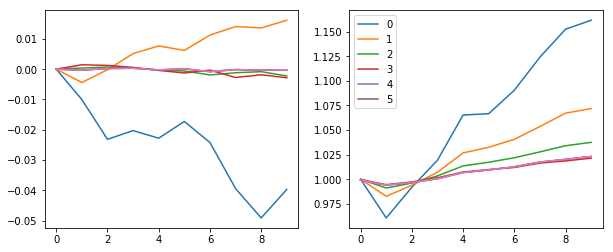

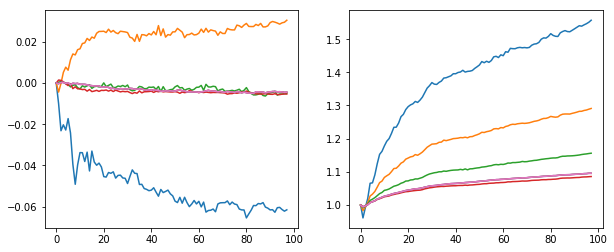

In [38]:
with Hooks(learn.model, append_stats) as hooks:
    run.fit(1, learn)
    fig,(ax0,ax1) = plt.subplots(1,2, figsize=(10,4))
    for h in hooks[:-1]:
        ms,ss = h.stats
        ax0.plot(ms[:10])
        ax1.plot(ss[:10])
    plt.legend(range(6));
    
    fig,(ax0,ax1) = plt.subplots(1,2, figsize=(10,4))
    for h in hooks[:-1]:
        ms,ss = h.stats
        ax0.plot(ms)
        ax1.plot(ss)

In [42]:
learn,run = get_learn_run(nfs, data, 0.85, conv_layer, cbs=cbfs)

%time run.fit(5, learn)

train: [0.2652420703125, tensor(0.9175, device='cuda:0')]
valid: [0.16534803466796874, tensor(0.9498, device='cuda:0')]
train: [0.092765751953125, tensor(0.9714, device='cuda:0')]
valid: [0.09234058227539063, tensor(0.9708, device='cuda:0')]
train: [0.0669977294921875, tensor(0.9794, device='cuda:0')]
valid: [0.08945142211914063, tensor(0.9724, device='cuda:0')]
train: [0.0537047509765625, tensor(0.9831, device='cuda:0')]
valid: [0.10258529052734375, tensor(0.9702, device='cuda:0')]
train: [0.0449621533203125, tensor(0.9854, device='cuda:0')]
valid: [0.06440958251953124, tensor(0.9809, device='cuda:0')]
CPU times: user 5.31 s, sys: 568 ms, total: 5.88 s
Wall time: 5.88 s


In [43]:
learn,run = get_learn_run(nfs, data, 1.0, conv_layer, cbs=cbfs)

%time run.fit(5, learn)

train: [0.253840390625, tensor(0.9202, device='cuda:0')]
valid: [0.12025931396484375, tensor(0.9636, device='cuda:0')]
train: [0.08339240234375, tensor(0.9747, device='cuda:0')]
valid: [0.10728033447265625, tensor(0.9664, device='cuda:0')]
train: [0.0624084228515625, tensor(0.9809, device='cuda:0')]
valid: [0.12916085205078126, tensor(0.9619, device='cuda:0')]
train: [0.047849130859375, tensor(0.9854, device='cuda:0')]
valid: [0.103679931640625, tensor(0.9676, device='cuda:0')]
train: [0.04045895751953125, tensor(0.9874, device='cuda:0')]
valid: [0.10622989501953126, tensor(0.9718, device='cuda:0')]
CPU times: user 5.37 s, sys: 622 ms, total: 5.99 s
Wall time: 5.98 s


In [47]:
learn,run = get_learn_run(nfs, data, 0.9, conv_layer, cbs=cbfs)

%time run.fit(5, learn)

train: [0.29049447265625, tensor(0.9102, device='cuda:0')]
valid: [0.17383809814453124, tensor(0.9468, device='cuda:0')]
train: [0.09820775390625, tensor(0.9699, device='cuda:0')]
valid: [0.09666119384765624, tensor(0.9714, device='cuda:0')]
train: [0.07014521484375, tensor(0.9780, device='cuda:0')]
valid: [0.08955065307617187, tensor(0.9726, device='cuda:0')]
train: [0.0554037646484375, tensor(0.9833, device='cuda:0')]
valid: [0.0904542236328125, tensor(0.9719, device='cuda:0')]
train: [0.0455511572265625, tensor(0.9859, device='cuda:0')]
valid: [0.08076631469726563, tensor(0.9761, device='cuda:0')]
CPU times: user 5.43 s, sys: 534 ms, total: 5.97 s
Wall time: 5.96 s


#### Builtin batchnorm

In [29]:
#export
def conv_layer(ni, nf, ks=3, stride=2, bn=True, **kwargs):
    layers = [nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride, bias=not bn),
              GeneralRelu(**kwargs)]
    if bn: layers.append(nn.BatchNorm2d(nf, eps=1e-5, momentum=0.1))
    return nn.Sequential(*layers)

learn,run = get_learn_run(nfs, data, 4., conv_layer, cbs=cbfs)
%time run.fit(5, learn)

train: [0.511205234375, tensor(0.8336, device='cuda:0')]
valid: [0.1488172607421875, tensor(0.9544, device='cuda:0')]
train: [0.090207763671875, tensor(0.9721, device='cuda:0')]
valid: [0.09464492797851562, tensor(0.9704, device='cuda:0')]
train: [0.0682173779296875, tensor(0.9790, device='cuda:0')]
valid: [0.07513945922851563, tensor(0.9782, device='cuda:0')]
train: [0.046308935546875, tensor(0.9851, device='cuda:0')]
valid: [0.06466155395507812, tensor(0.9800, device='cuda:0')]
train: [0.03762859375, tensor(0.9878, device='cuda:0')]
valid: [0.053961181640625, tensor(0.9843, device='cuda:0')]
CPU times: user 4.9 s, sys: 584 ms, total: 5.48 s
Wall time: 5.47 s


In [21]:
#export
def conv_layer(ni, nf, ks=3, stride=2, bn=True, **kwargs):
    layers = [nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride, bias=not bn),
              GeneralRelu(**kwargs)]
    if bn: layers.append(nn.BatchNorm2d(nf, eps=1e-5, momentum=0.1))
    return nn.Sequential(*layers)

learn,run = get_learn_run(nfs, data, 1, conv_layer, cbs=cbfs)
%time run.fit(5, learn)

train: [0.30061001953125, tensor(0.9096, device='cuda:0')]
valid: [0.1524759033203125, tensor(0.9534, device='cuda:0')]
train: [0.0813785302734375, tensor(0.9739, device='cuda:0')]
valid: [0.0703448486328125, tensor(0.9793, device='cuda:0')]
train: [0.0557771435546875, tensor(0.9824, device='cuda:0')]
valid: [0.08586849975585938, tensor(0.9745, device='cuda:0')]
train: [0.0438241552734375, tensor(0.9865, device='cuda:0')]
valid: [0.06521295776367188, tensor(0.9806, device='cuda:0')]
train: [0.03551069580078125, tensor(0.9882, device='cuda:0')]
valid: [0.0584620361328125, tensor(0.9817, device='cuda:0')]
CPU times: user 4.91 s, sys: 626 ms, total: 5.54 s
Wall time: 5.53 s


#### With scheduling

In [22]:
sched = combine_scheds([0.3, 0.7], [sched_lin(0.6, 2.), sched_lin(2., 0.1)]) 

learn,run = get_learn_run(nfs, data, 0.9, conv_layer, cbs=cbfs
                          +[partial(ParamScheduler,'lr', sched)])

run.fit(8, learn)

train: [0.31941458984375, tensor(0.9066, device='cuda:0')]
valid: [0.132680908203125, tensor(0.9588, device='cuda:0')]
train: [0.12924603515625, tensor(0.9605, device='cuda:0')]
valid: [0.10539952392578125, tensor(0.9683, device='cuda:0')]
train: [0.066176982421875, tensor(0.9791, device='cuda:0')]
valid: [0.08972996826171875, tensor(0.9692, device='cuda:0')]
train: [0.04029283203125, tensor(0.9874, device='cuda:0')]
valid: [0.060884503173828125, tensor(0.9813, device='cuda:0')]
train: [0.027576220703125, tensor(0.9915, device='cuda:0')]
valid: [0.0534090576171875, tensor(0.9832, device='cuda:0')]
train: [0.018805802001953125, tensor(0.9941, device='cuda:0')]
valid: [0.052223260498046875, tensor(0.9835, device='cuda:0')]
train: [0.01158542236328125, tensor(0.9970, device='cuda:0')]
valid: [0.04783311462402344, tensor(0.9863, device='cuda:0')]
train: [0.007989600830078126, tensor(0.9984, device='cuda:0')]
valid: [0.04786164245605469, tensor(0.9860, device='cuda:0')]


In [30]:
sched = combine_scheds([0.3, 0.7], [sched_lin(0.6, 3.), sched_lin(3., 0.1)]) 

learn,run = get_learn_run(nfs, data, 0.9, conv_layer, cbs=cbfs
                          +[partial(ParamScheduler,'lr', sched)])

run.fit(8, learn)

train: [0.312761328125, tensor(0.9085, device='cuda:0')]
valid: [0.2089347900390625, tensor(0.9348, device='cuda:0')]
train: [0.110280205078125, tensor(0.9654, device='cuda:0')]
valid: [0.113768505859375, tensor(0.9673, device='cuda:0')]
train: [0.0817685595703125, tensor(0.9740, device='cuda:0')]
valid: [0.0739475830078125, tensor(0.9773, device='cuda:0')]
train: [0.043726728515625, tensor(0.9863, device='cuda:0')]
valid: [0.062292724609375, tensor(0.9812, device='cuda:0')]
train: [0.02859611328125, tensor(0.9907, device='cuda:0')]
valid: [0.06478782348632812, tensor(0.9820, device='cuda:0')]
train: [0.0189613818359375, tensor(0.9941, device='cuda:0')]
valid: [0.04323339538574219, tensor(0.9868, device='cuda:0')]
train: [0.0109611669921875, tensor(0.9970, device='cuda:0')]
valid: [0.043109307861328126, tensor(0.9878, device='cuda:0')]
train: [0.0074640771484375, tensor(0.9985, device='cuda:0')]
valid: [0.043522909545898436, tensor(0.9876, device='cuda:0')]


### Layernorm

In [33]:
class LayerNorm(nn.Module):
    __constants__ = ['eps']
    def __init__(self, eps=1e-5):
        super().__init__()
        self.eps = eps
        self.mult = nn.Parameter(tensor(1.))
        self.add  = nn.Parameter(tensor(0.))

    def forward(self, x):
        m = x.mean((1,2,3), keepdim=True)
        v = x.var ((1,2,3), keepdim=True)
        x = (x-m) / ((v+self.eps).sqrt())
        return x*self.mult + self.add
    
def conv_ln(ni, nf, ks=3, stride=2, bn=True, **kwargs):
    layers = [nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride, bias=True),
              GeneralRelu(**kwargs)]
    if bn: layers.append(LayerNorm())
    return nn.Sequential(*layers)

In [39]:
learn,run = get_learn_run(nfs, data, 0.5, conv_ln, cbs=cbfs)
%time run.fit(5, learn)

train: [0.4195255078125, tensor(0.8645, device='cuda:0')]
valid: [0.1119390625, tensor(0.9652, device='cuda:0')]
train: [0.10390806640625, tensor(0.9679, device='cuda:0')]
valid: [0.14279937744140625, tensor(0.9610, device='cuda:0')]
train: [0.061377802734375, tensor(0.9805, device='cuda:0')]
valid: [0.07315323486328125, tensor(0.9782, device='cuda:0')]
train: [0.04221341796875, tensor(0.9867, device='cuda:0')]
valid: [0.0640574951171875, tensor(0.9802, device='cuda:0')]
train: [0.0305229638671875, tensor(0.9902, device='cuda:0')]
valid: [0.23301806640625, tensor(0.9436, device='cuda:0')]
CPU times: user 6.1 s, sys: 644 ms, total: 6.74 s
Wall time: 6.73 s


### Instance Norm

In [60]:
class InstanceNorm(nn.Module):
    __constants__ = ['eps']
    def __init__(self, nf, eps=1e-0):
        super().__init__()
        self.eps = eps
        self.mults = nn.Parameter(torch.ones (nf,1,1))
        self.adds  = nn.Parameter(torch.zeros(nf,1,1))

    def forward(self, x):
        m = x.mean((2,3), keepdim=True)
        v = x.var ((2,3), keepdim=True)
        res = (x-m) / ((v+self.eps).sqrt())
        return res*self.mults + self.adds

In [61]:
def conv_in(ni, nf, ks=3, stride=2, bn=True, **kwargs):
    layers = [nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride, bias=True),
              GeneralRelu(**kwargs)]
    if bn: layers.append(InstanceNorm(nf))
    return nn.Sequential(*layers)

In [66]:
learn,run = get_learn_run(nfs, data, 0.001, conv_in, cbs=cbfs)
%time run.fit(5, learn)

train: [nan, tensor(0.0986, device='cuda:0')]
valid: [nan, tensor(0.0991, device='cuda:0')]
train: [nan, tensor(0.0986, device='cuda:0')]
valid: [nan, tensor(0.0991, device='cuda:0')]
train: [nan, tensor(0.0986, device='cuda:0')]
valid: [nan, tensor(0.0991, device='cuda:0')]
train: [nan, tensor(0.0986, device='cuda:0')]
valid: [nan, tensor(0.0991, device='cuda:0')]
train: [nan, tensor(0.0986, device='cuda:0')]
valid: [nan, tensor(0.0991, device='cuda:0')]
CPU times: user 6.16 s, sys: 628 ms, total: 6.78 s
Wall time: 6.78 s


### Fix small batch sizes 

In [67]:
data = DataBunch(*get_dls(train_ds, valid_ds, 2), c)
def conv_layer(ni, nf, ks=3, stride=2, bn=True, **kwargs):
    layers = [nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride, bias=not bn),
              GeneralRelu(**kwargs)]
    if bn: layers.append(nn.BatchNorm2d(nf, eps=1e-5, momentum=0.1))
    return nn.Sequential(*layers)

In [68]:
learn,run = get_learn_run(nfs, data, 0.4, conv_layer, cbs=cbfs)
%time run.fit(5, learn)

train: [2.29279625, tensor(0.2002, device='cuda:0')]
valid: [110837314.3552, tensor(0.1884, device='cuda:0')]
CPU times: user 1min 24s, sys: 881 ms, total: 1min 24s
Wall time: 1min 24s


In [69]:
%time run.fit(3, learn)

train: [2.316385625, tensor(0.1790, device='cuda:0')]
valid: [3064467.6608, tensor(0.1648, device='cuda:0')]
train: [2.31255109375, tensor(0.1845, device='cuda:0')]
valid: [778914.8672, tensor(0.2132, device='cuda:0')]
train: [2.30442484375, tensor(0.1881, device='cuda:0')]
valid: [9268678.656, tensor(0.1950, device='cuda:0')]
CPU times: user 4min 10s, sys: 3.6 s, total: 4min 14s
Wall time: 4min 13s


#### Running Batchnorm

In [70]:
class RunningBatchNorm(nn.Module):
    def __init__(self, nf, mom=0.1, eps=1e-5):
        super().__init__()
        self.mom,self.eps = mom,eps
        self.mults = nn.Parameter(torch.ones (nf,1,1))
        self.adds = nn.Parameter(torch.zeros(nf,1,1))
        self.register_buffer('sums', torch.zeros(1,nf,1,1))
        self.register_buffer('sqrs', torch.zeros(1,nf,1,1))
        self.register_buffer('batch', tensor(0.))
        self.register_buffer('count', tensor(0.))
        self.register_buffer('step', tensor(0.))
        self.register_buffer('dbias', tensor(0.))

    def update_stats(self, x):
        bs,nc,*_ = x.shape
        self.sums.detach_()
        self.sqrs.detach_()
        dims = (0,2,3)
        s = x.sum(dims, keepdim=True)
        ss = (x*x).sum(dims, keepdim=True)
        c = self.count.new_tensor(x.numel()/nc)
        mom1 = 1 - (1-self.mom)/math.sqrt(bs-1)
        self.mom1 = self.dbias.new_tensor(mom1)
        self.sums.lerp_(s, self.mom1)
        self.sqrs.lerp_(ss, self.mom1)
        self.count.lerp_(c, self.mom1)
        self.dbias = self.dbias*(1-self.mom1) + self.mom1
        self.batch += bs
        self.step += 1

    def forward(self, x):
        if self.training: self.update_stats(x)
        sums = self.sums
        sqrs = self.sqrs
        c = self.count
        if self.step<100:
            sums = sums / self.dbias
            sqrs = sqrs / self.dbias
            c    = c    / self.dbias
        means = sums/c
        vars = (sqrs/c).sub_(means*means)
        if bool(self.batch < 20): vars.clamp_min_(0.01)
        x = (x-means).div_((vars.add_(self.eps)).sqrt())
        return x.mul_(self.mults).add_(self.adds)

In [71]:
def conv_rbn(ni, nf, ks=3, stride=2, bn=True, **kwargs):
    layers = [nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride, bias=not bn),
              GeneralRelu(**kwargs)]
    if bn: layers.append(RunningBatchNorm(nf))
    return nn.Sequential(*layers)

In [72]:
learn,run = get_learn_run(nfs, data, 0.4, conv_rbn, cbs=cbfs)
%time run.fit(1, learn)

train: [0.6220980078125, tensor(0.8293, device='cuda:0')]
valid: [1.073240234375, tensor(0.9406, device='cuda:0')]
CPU times: user 3min 32s, sys: 1.98 s, total: 3min 34s
Wall time: 3min 34s


#### Single epoch best

In [96]:
data = DataBunch(*get_dls(train_ds, valid_ds, 32), c)

sched = combine_scheds([0.4, 0.6], [sched_lin(0.6, 3.), sched_lin(3., 0.1)]) 

learn,run = get_learn_run(nfs, data, 0.9, conv_layer, cbs=cbfs
                          +[partial(ParamScheduler,'lr', sched)])

In [97]:
%time run.fit(1, learn)

train: [0.21637677734375, tensor(0.9347, device='cuda:0')]
valid: [0.05533582153320313, tensor(0.9833, device='cuda:0')]
CPU times: user 6.22 s, sys: 60.2 ms, total: 6.28 s
Wall time: 6.27 s


In [75]:
learn,run = get_learn_run(nfs, data, 0.9, conv_layer, cbs=cbfs
                          +[partial(ParamScheduler,'lr', sched)])

%time run.fit(1, learn)

train: [0.1696855078125, tensor(0.9480, device='cuda:0')]
valid: [0.04934849548339844, tensor(0.9861, device='cuda:0')]
CPU times: user 6.17 s, sys: 64.2 ms, total: 6.23 s
Wall time: 6.22 s
